In [180]:
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas import datetime
%matplotlib inline

In [11]:
fname = 'mart'

In [12]:
wb = load_workbook(fname + '.xlsx')

In [13]:
for i in wb.get_sheet_names():
    print(i)

Лист1
Лист2
Лист3
Sheet4


In [19]:
data = pd.DataFrame(wb[u'Лист1'].values)

In [251]:
data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2017-02-01 00:00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Ноль,=SUM(AA2:AL2),None,None,None,None,None,None,None,None,...,=J2-I2,=L2-K2,=N2-M2,=P2-O2,=R2-Q2,=T2-S2,=V2-U2,=X2-W2,=Z2-Y2,None
2,Один,=SUM(AA3:AL3),None,None,None,None,None,None,None,None,...,=J3-I3,=L3-K3,=N3-M3,=P3-O3,=R3-Q3,=T3-S3,=V3-U3,=X3-W3,=Z3-Y3,None
3,Два,=SUM(AA4:AL4),None,None,None,None,None,None,None,None,...,=J4-I4,=L4-K4,=N4-M4,=P4-O4,=R4-Q4,=T4-S4,=V4-U4,=X4-W4,=Z4-Y4,None
4,Три,=SUM(AA5:AL5),None,None,None,None,None,None,None,None,...,=J5-I5,=L5-K5,=N5-M5,=P5-O5,=R5-Q5,=T5-S5,=V5-U5,=X5-W5,=Z5-Y5,None
5,Четыре,=SUM(AA6:AL6),None,None,None,None,None,None,None,None,...,=J6-I6,=L6-K6,=N6-M6,=P6-O6,=R6-Q6,=T6-S6,=V6-U6,=X6-W6,=Z6-Y6,None
6,Пять,=SUM(AA7:AL7),None,None,None,None,None,None,None,None,...,=J7-I7,=L7-K7,=N7-M7,=P7-O7,=R7-Q7,=T7-S7,=V7-U7,=X7-W7,=Z7-Y7,None
7,Шесть,=SUM(AA8:AL8),None,None,None,None,None,None,None,None,...,=J8-I8,=L8-K8,=N8-M8,=P8-O8,=R8-Q8,=T8-S8,=V8-U8,=X8-W8,=Z8-Y8,None
8,Семь,=SUM(AA9:AL9),None,None,None,None,None,None,None,None,...,=J9-I9,=L9-K9,=N9-M9,=P9-O9,=R9-Q9,=T9-S9,=V9-U9,=X9-W9,=Z9-Y9,None
9,Восемь,=SUM(AA10:AL10),None,None,None,None,None,None,None,None,...,=J10-I10,=L10-K10,=N10-M10,=P10-O10,=R10-Q10,=T10-S10,=V10-U10,=X10-W10,=Z10-Y10,None


In [264]:
data.loc[80:90]

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
80,Девять,"=SUM(AA81,AL81)",None,None,None,None,None,None,None,None,...,=J81-I81,=L81-K81,=N81-M81,=P81-O81,=R81-Q81,=T81-S81,=V81-U81,=X81-W81,=Z81-Y81,None
81,Десять,=SUM(AA82),None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
82,Всего,=SUM(B72:B82),None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,=B83
83,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
84,"=DATE(2017,2,1)",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
85,Ноль,=SUM(AA86:AL86),None,None,None,None,None,None,None,None,...,=J86-I86,=L86-K86,=N86-M86,=P86-O86,=R86-Q86,=T86-S86,=V86-U86,=X86-W86,=Z86-Y86,None
86,Один,=SUM(AA87:AL87),None,None,None,None,None,None,None,None,...,=J87-I87,=L87-K87,=N87-M87,=P87-O87,=R87-Q87,=T87-S87,=V87-U87,=X87-W87,=Z87-Y87,None
87,Два,=SUM(AA88:AL88),None,None,None,None,None,None,None,None,...,=J88-I88,=L88-K88,=N88-M88,=P88-O88,=R88-Q88,=T88-S88,=V88-U88,=X88-W88,=Z88-Y88,None
88,Три,=SUM(AA89:AL89),None,None,None,None,None,None,None,None,...,=J89-I89,=L89-K89,=N89-M89,=P89-O89,=R89-Q89,=T89-S89,=V89-U89,=X89-W89,=Z89-Y89,None
89,Четыре,=SUM(AA90:AL90),None,None,None,None,None,None,None,None,...,=J90-I90,=L90-K90,=N90-M90,=P90-O90,=R90-Q90,=T90-S90,=V90-U90,=X90-W90,=Z90-Y90,None


In [29]:
days = np.where(data[0] == u'Ноль')

In [258]:
days

(array([  1,  15,  29,  43,  57,  71,  85,  99, 113, 127, 141, 155, 169,
        183, 197, 211, 225, 239, 253, 267, 281, 295, 309, 323, 337, 351,
        365, 379, 393, 407, 421]),)

In [259]:
arri = 0
dayi = days[0][arri]

In [257]:
dayrow = data.iloc[[dayi]]

In [260]:
dtime = data.iloc[[dayi - 1]][0].values[0]

In [71]:
date = dtime.date()

In [249]:
print(date)

2017-02-01


In [81]:
dayi = 407

In [83]:
rowi = dayi
row = data.iloc[[rowi]]

In [216]:
colormap = plt.get_cmap('jet')

In [235]:
mycolors = [colormap(i) for i in np.linspace(0, 1, 11)]

In [243]:
mycolors = [(mycolors[i][0], mycolors[i][1], mycolors[i][2], 0.6) for i in xrange(len(mycolors))]

In [245]:
mycolormap = matplotlib.colors.ListedColormap(mycolors)

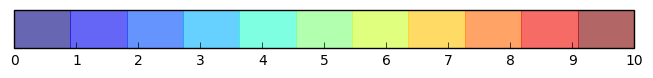

In [246]:
# fig = plt.figure(figsize=(8, 2))
# ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
fig, axes = plt.subplots(1, 1)
fig.set_size_inches((8, 0.5))
cbase = matplotlib.colorbar.ColorbarBase(axes, cmap = mycolormap,
                                         norm = matplotlib.colors.Normalize(vmin = 0, vmax = 10),
                                         orientation = 'horizontal')
plt.show()

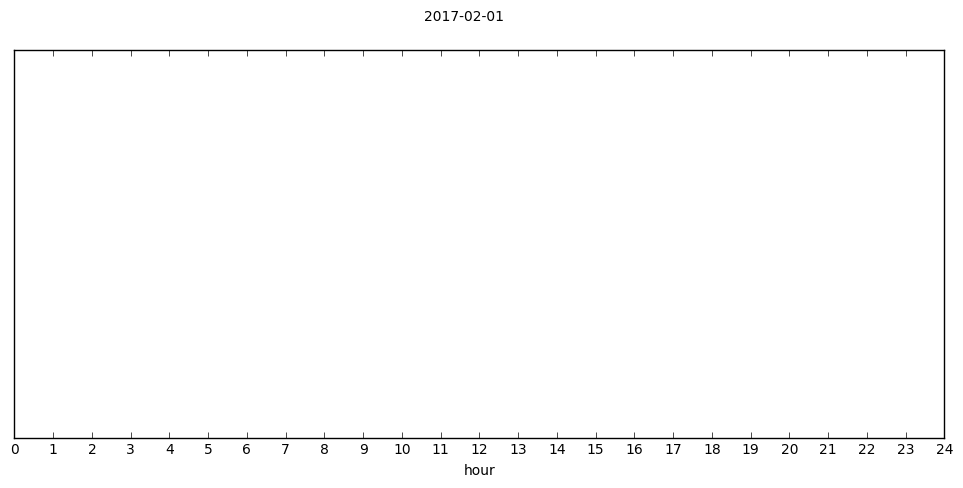

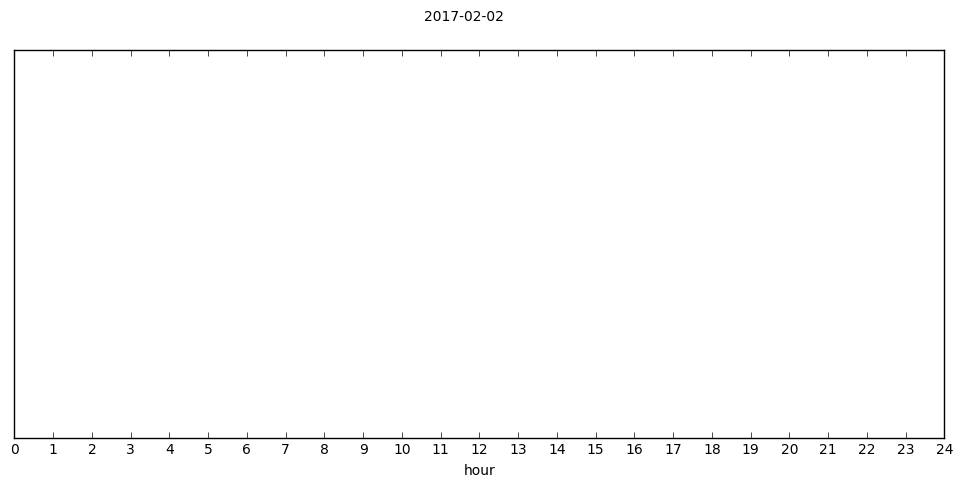

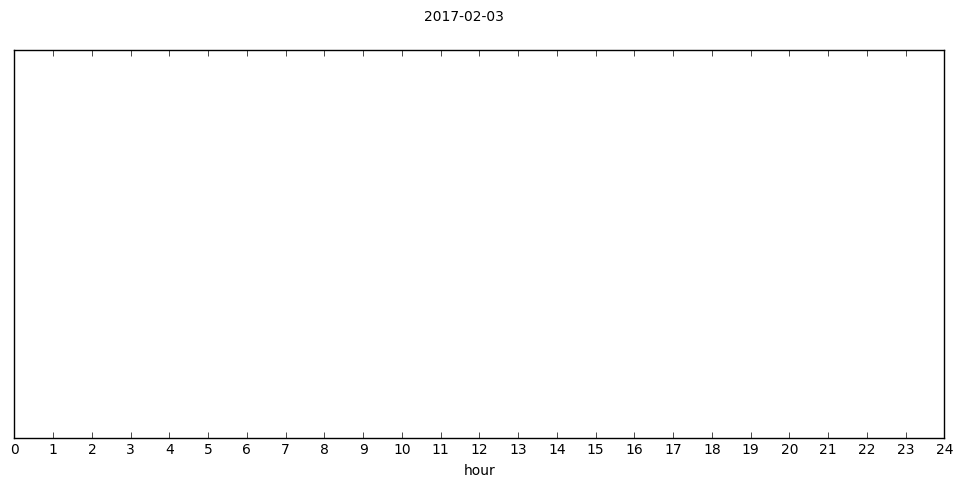

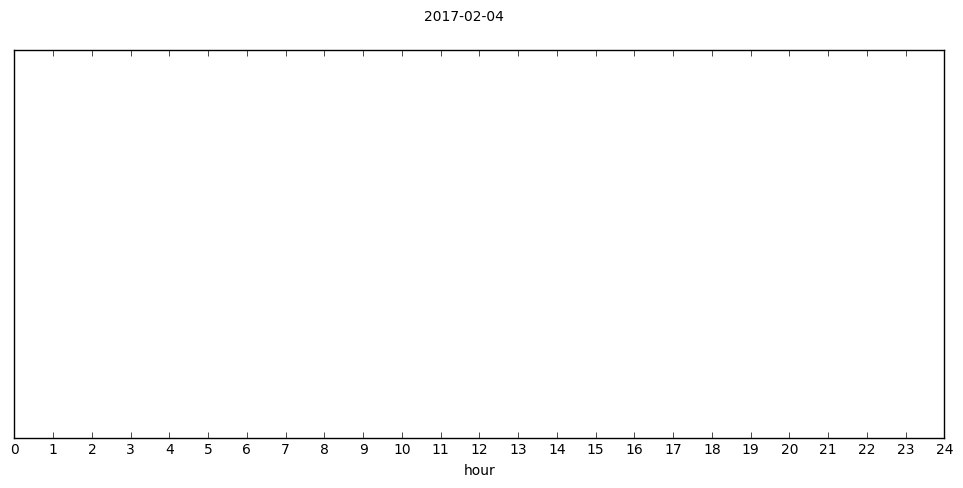

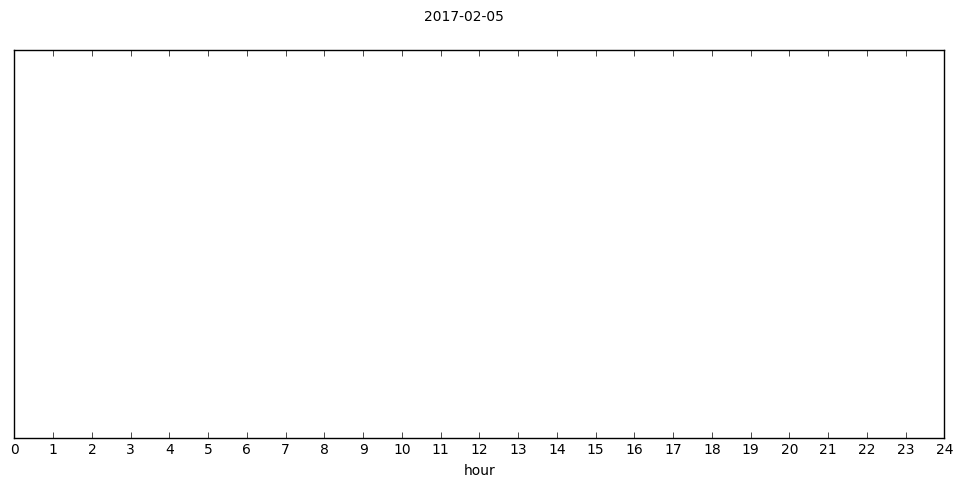

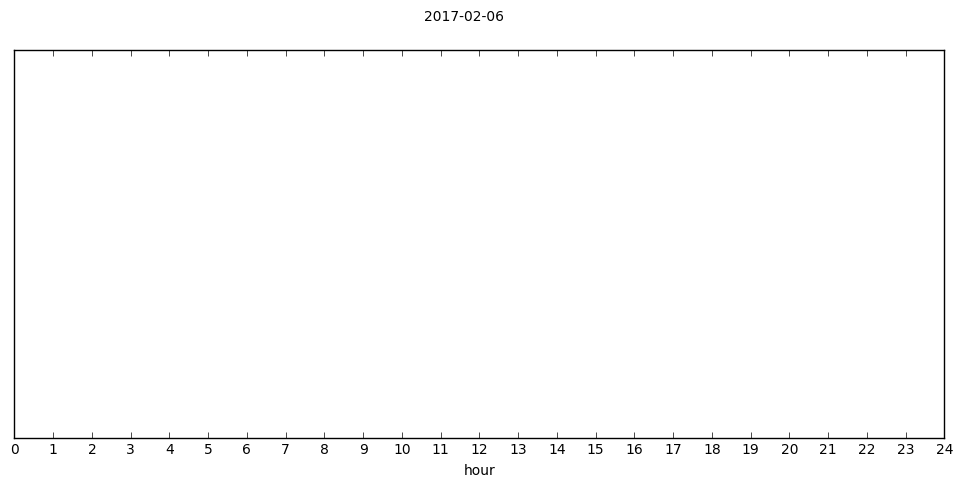

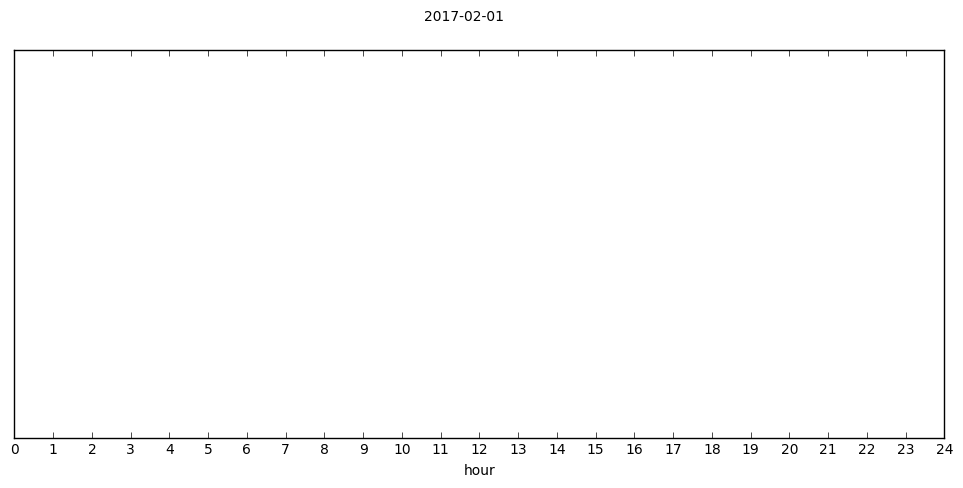

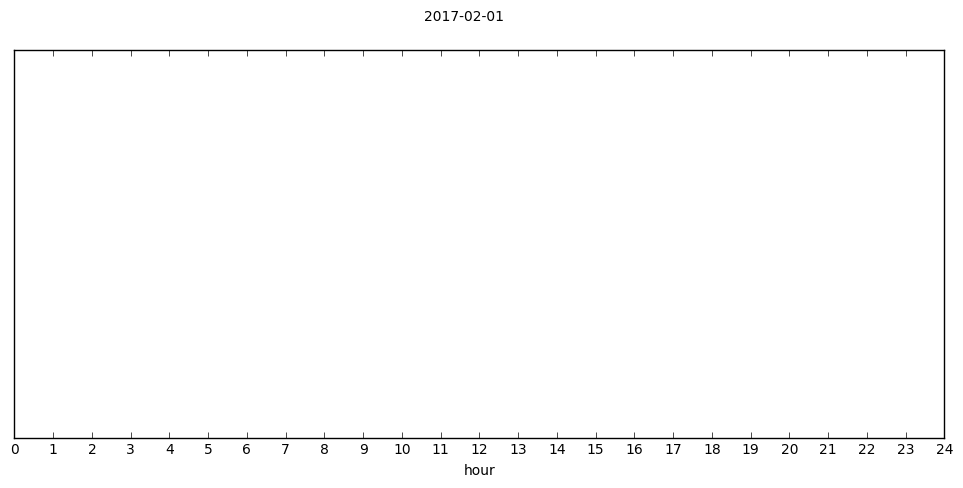

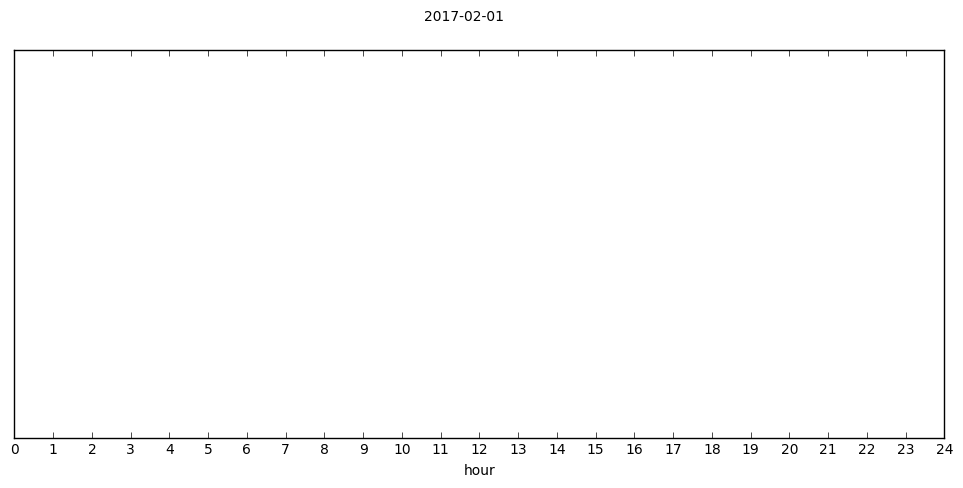

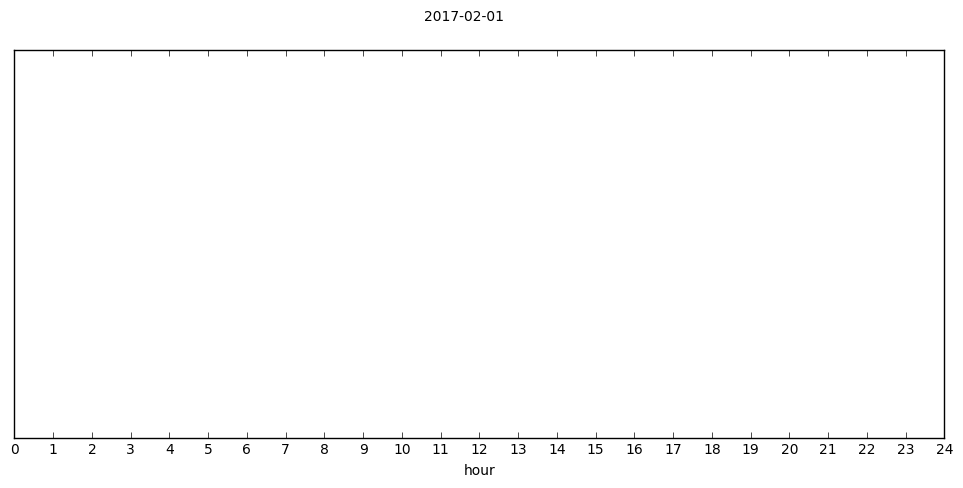

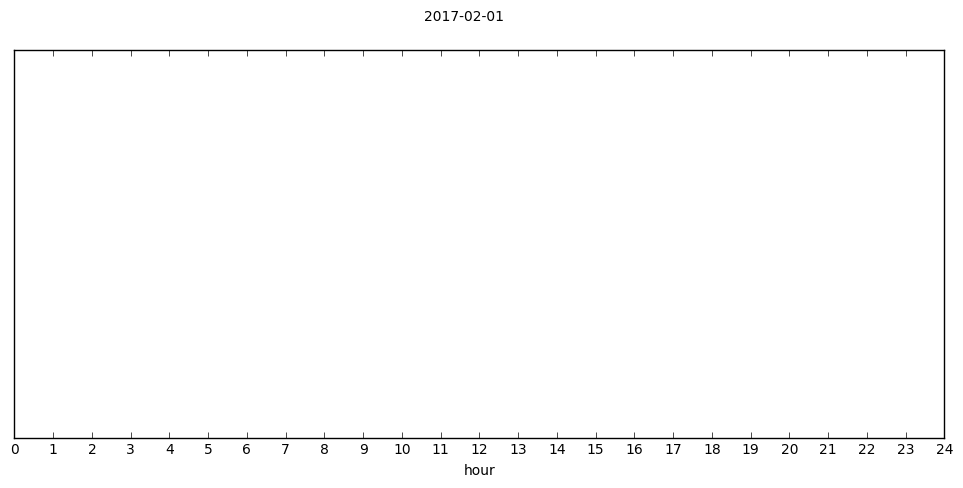

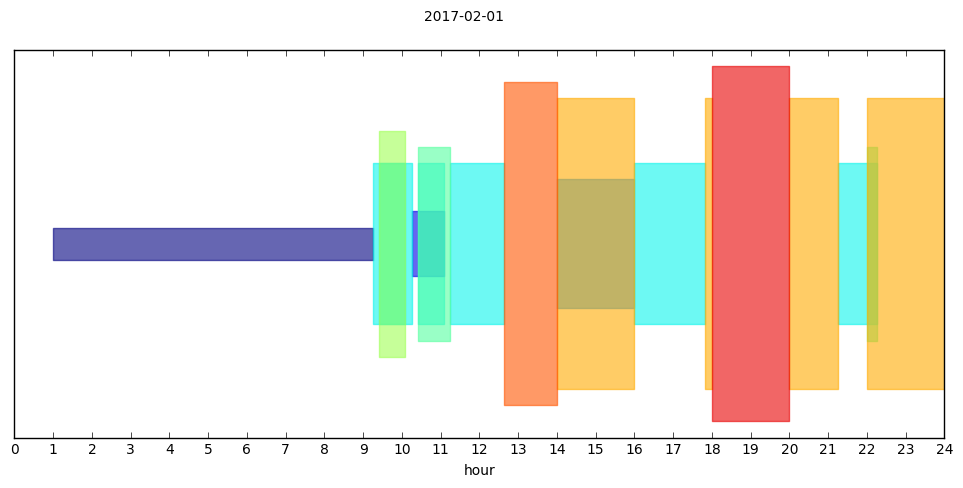

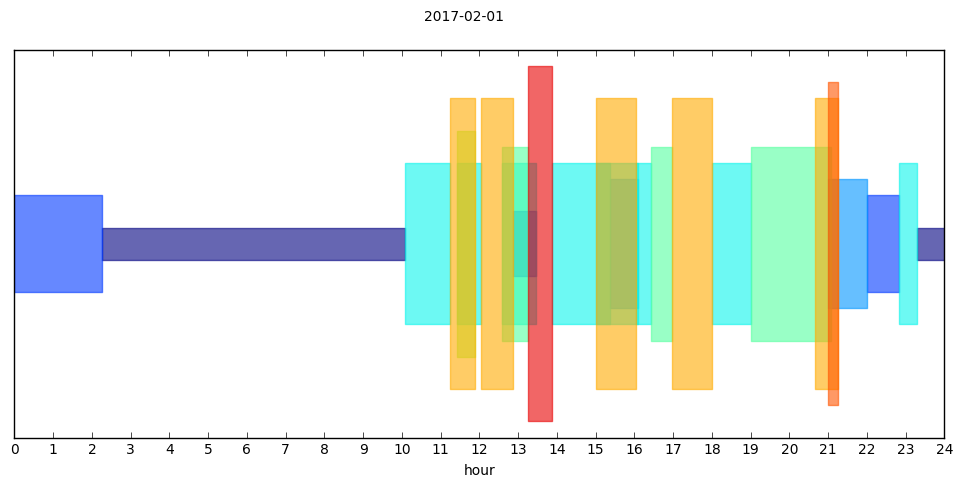

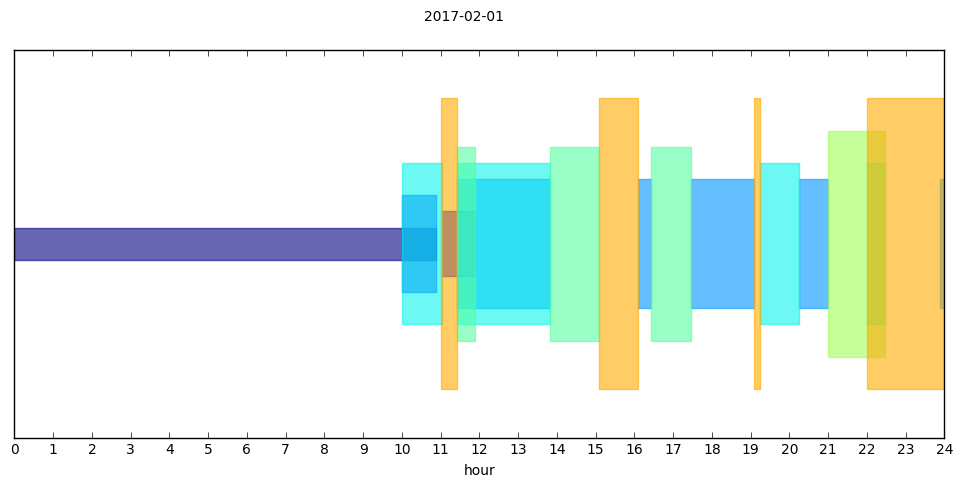

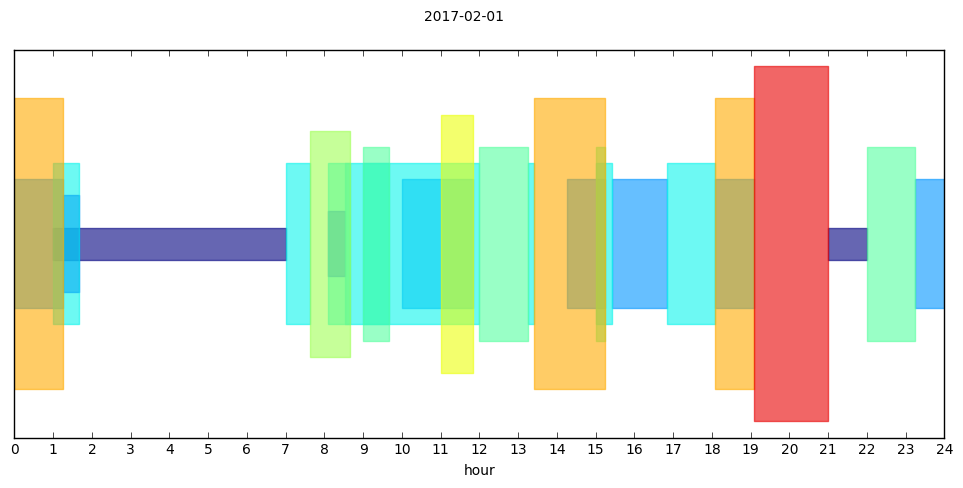

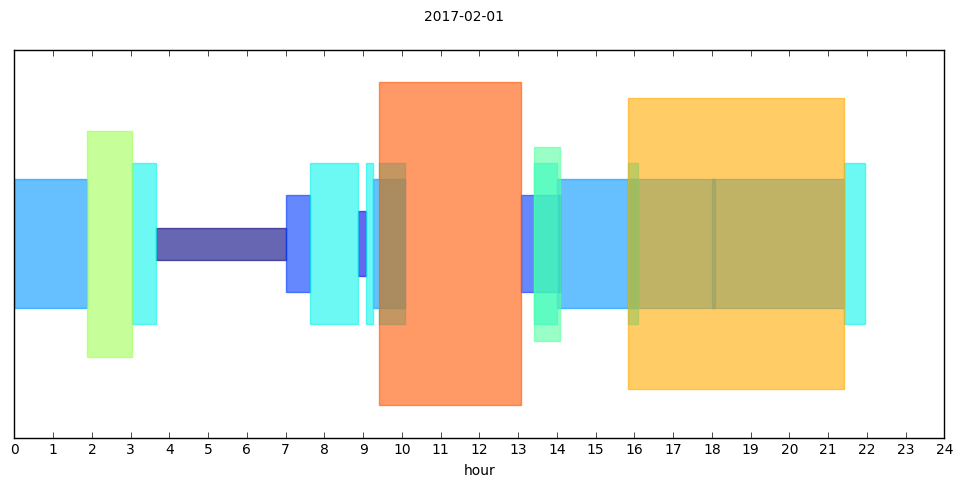

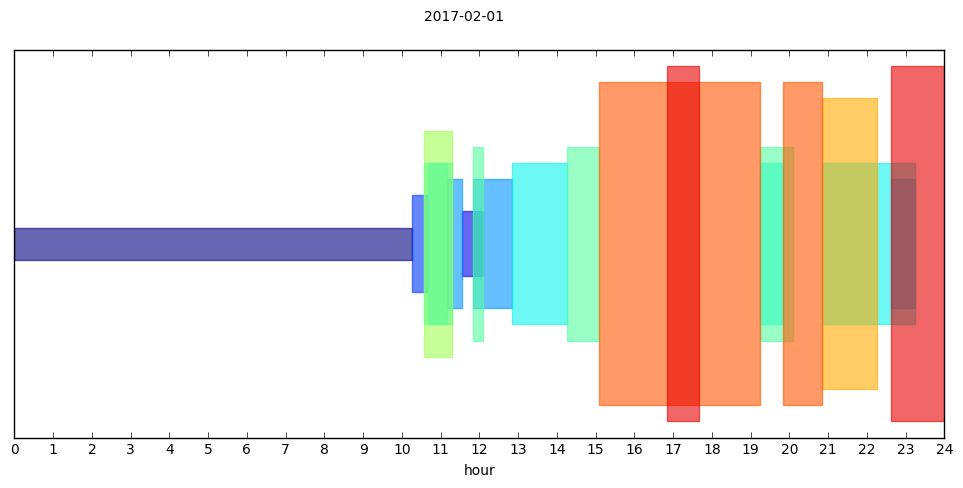

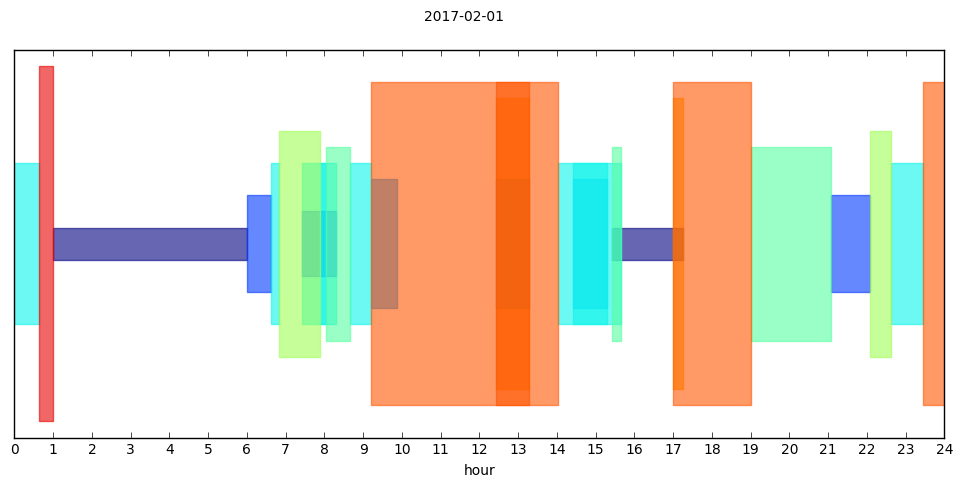

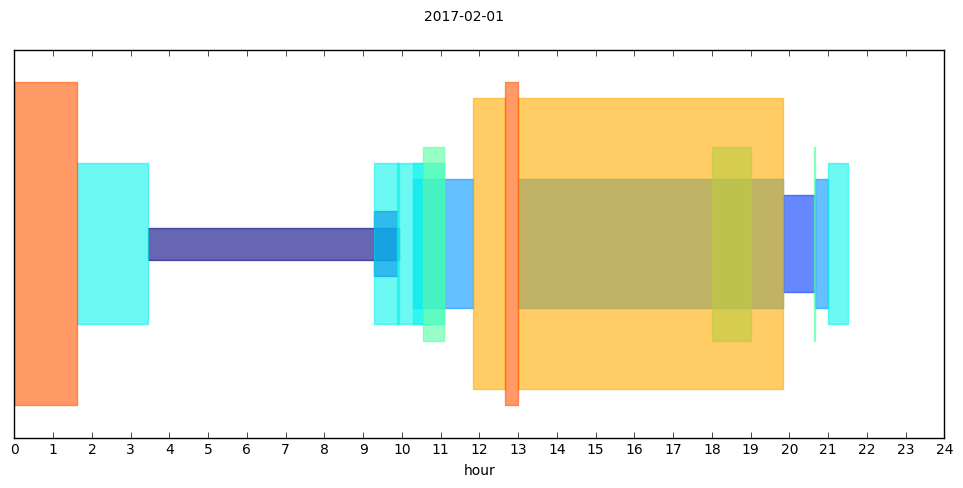

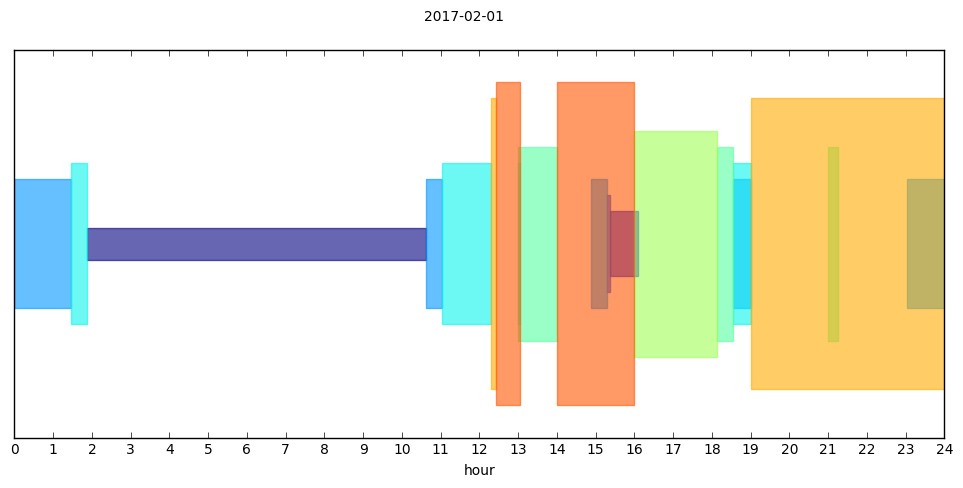

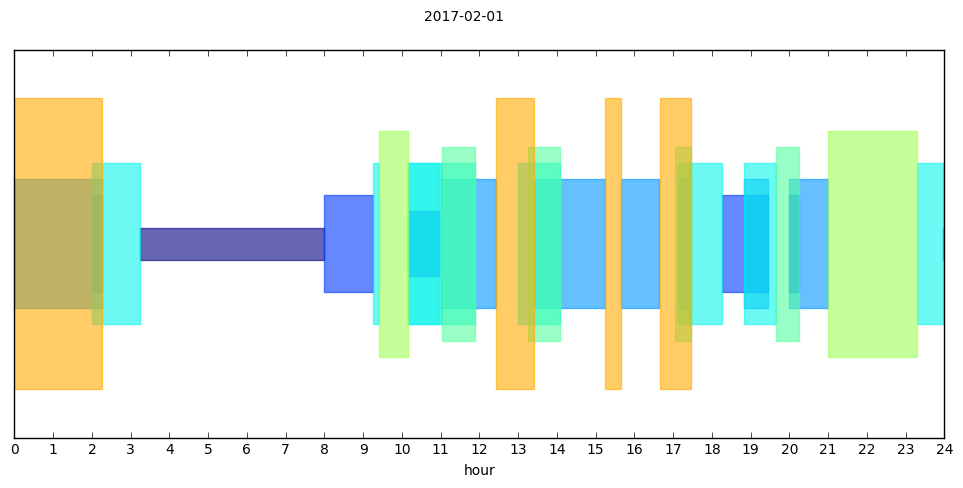

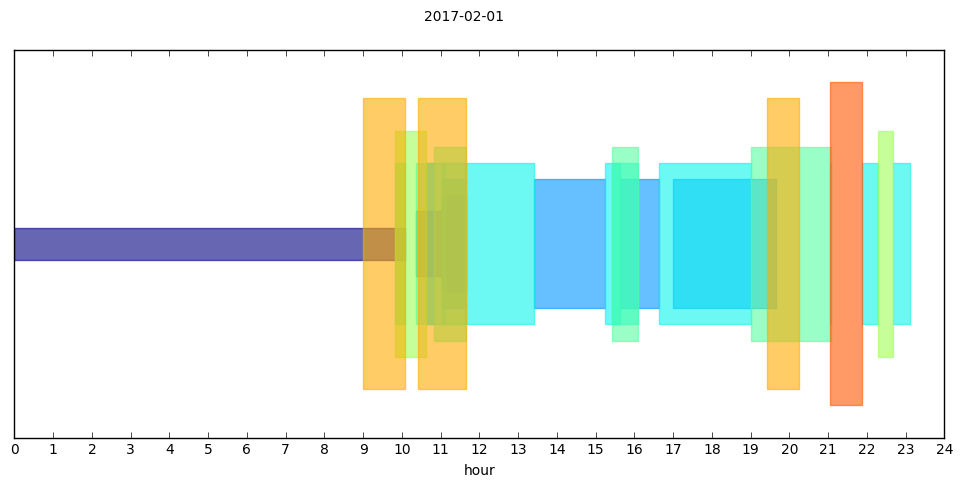

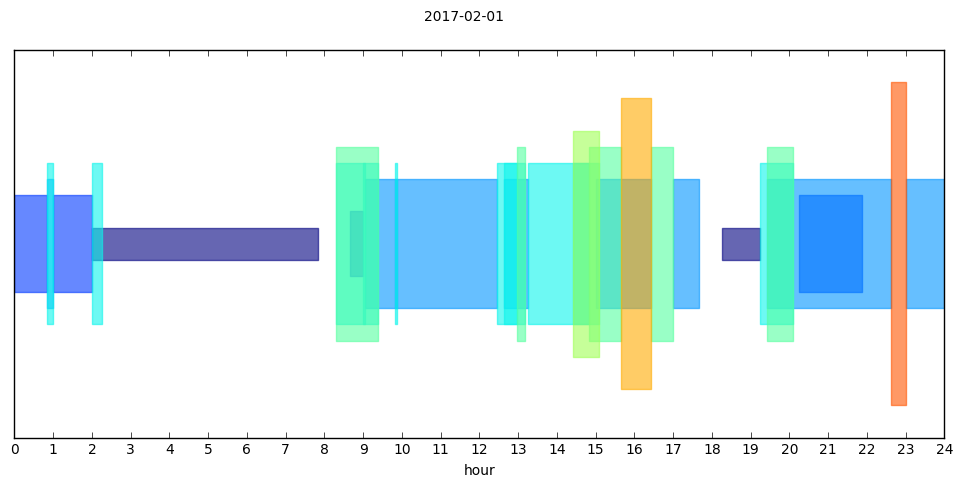

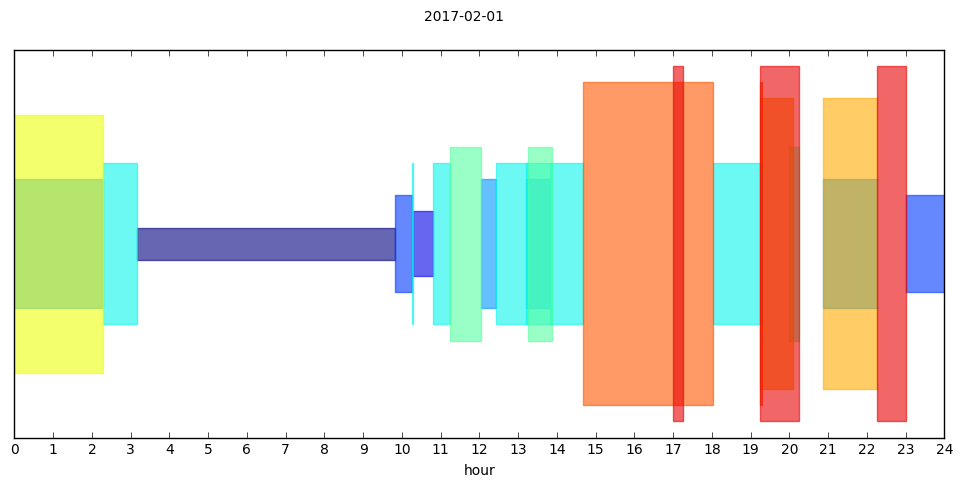

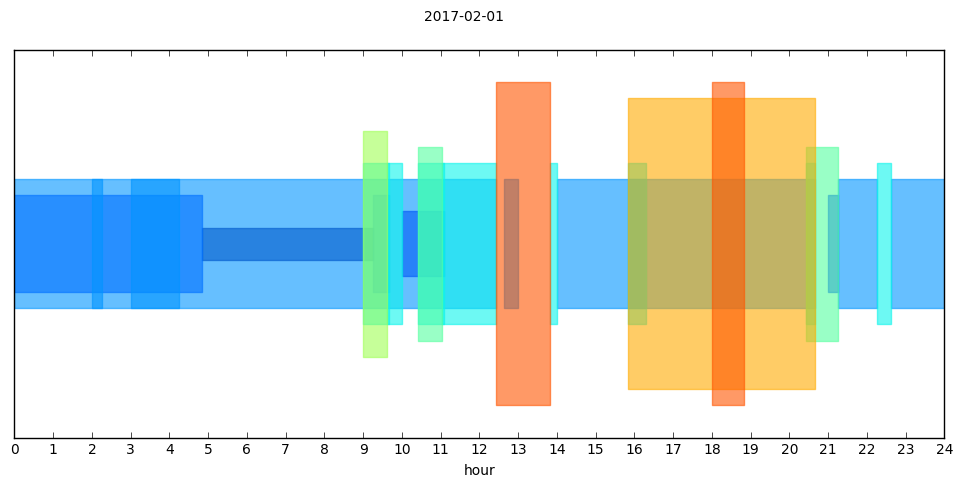

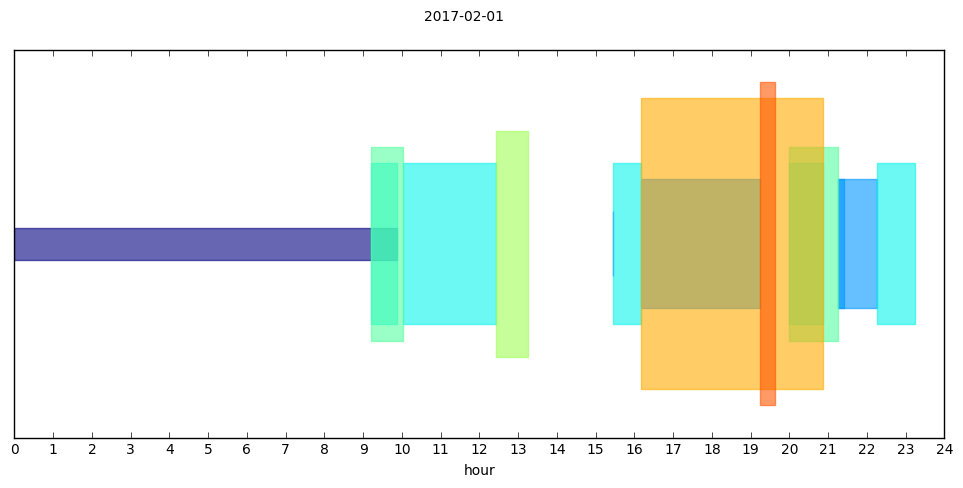

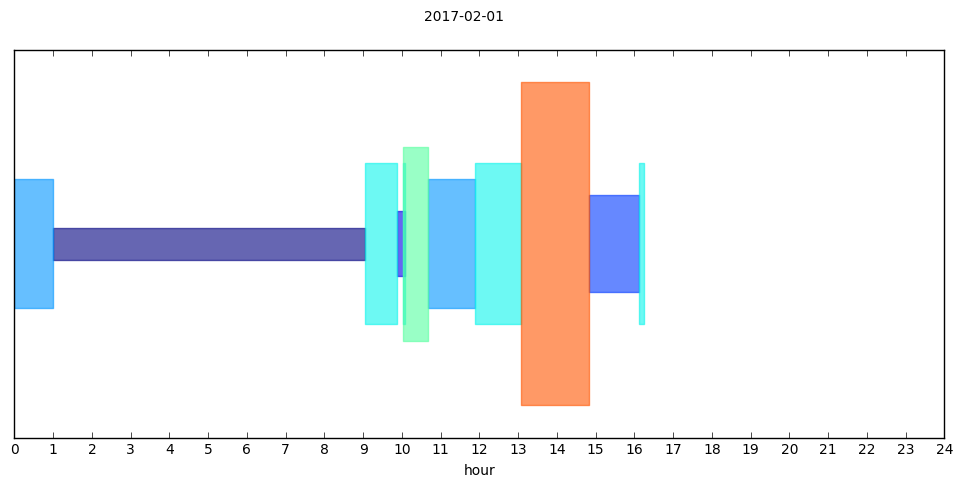

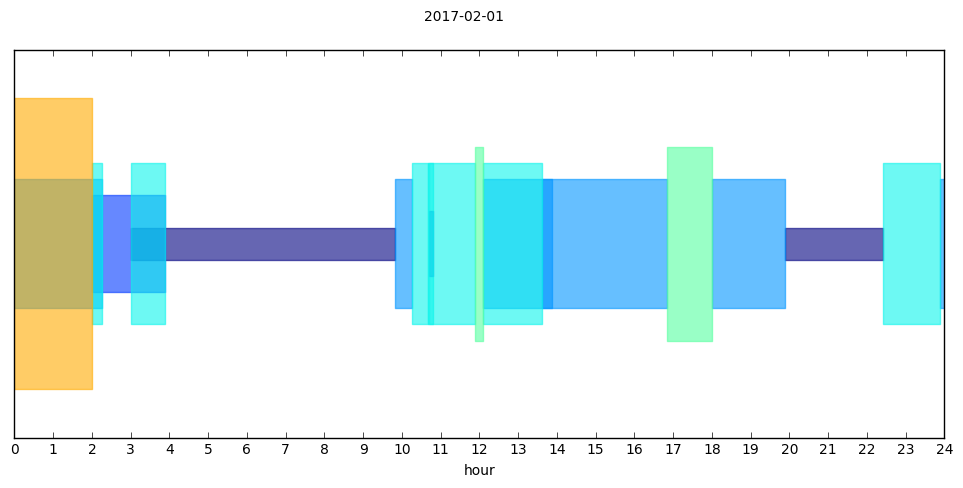

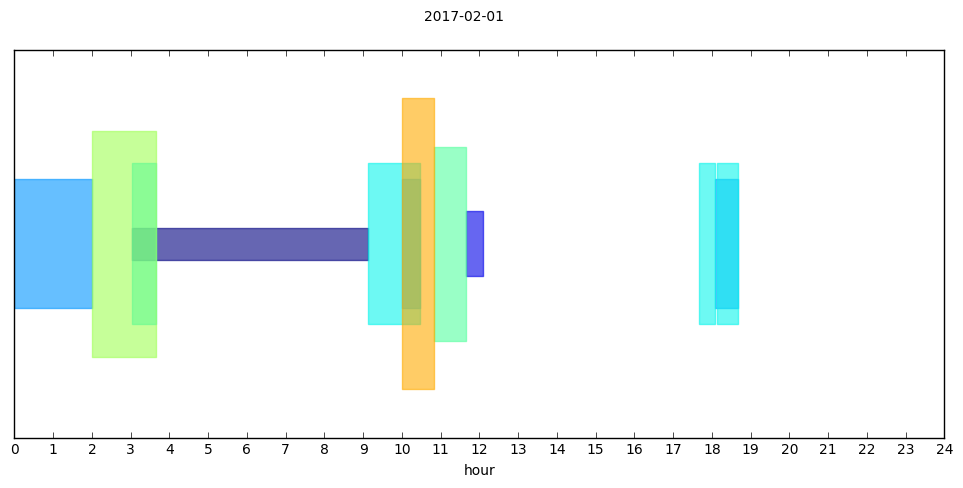

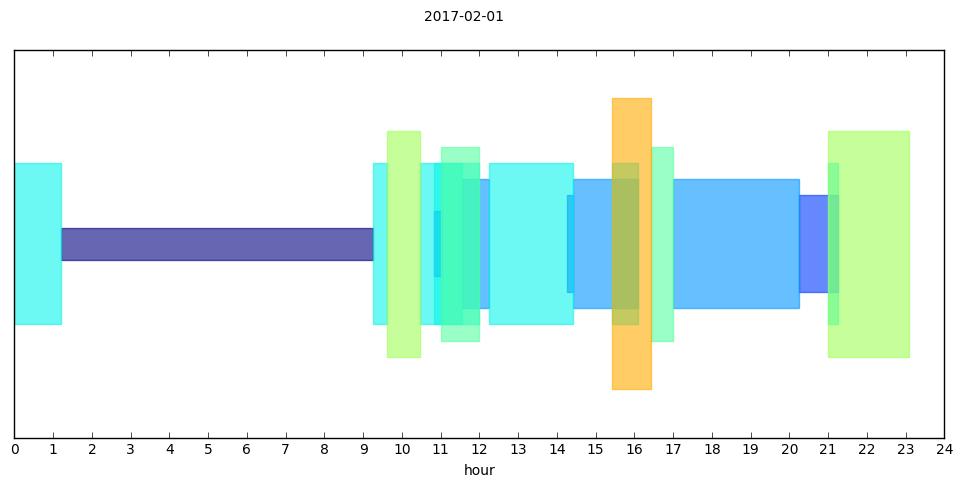

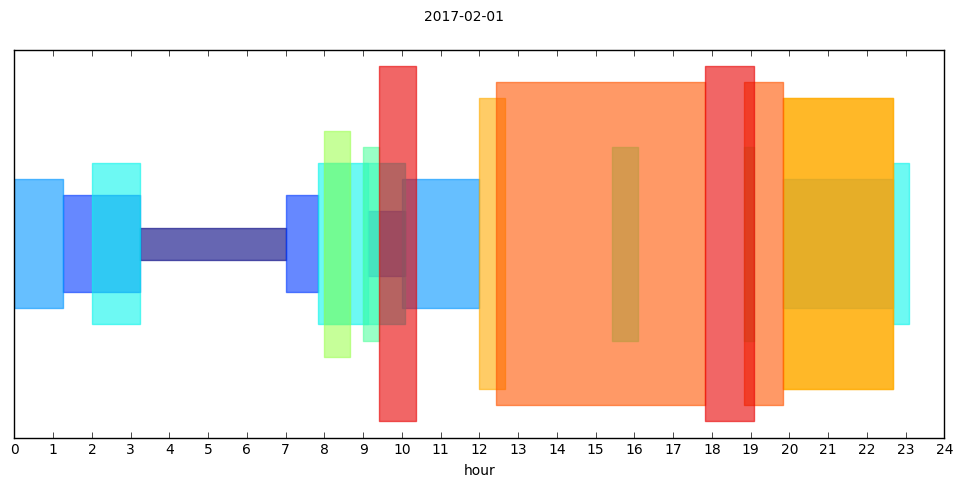

In [278]:
for dayi in days[0]:
    dtime = data.iloc[[dayi - 1]][0].values[0]
#     print(dayi, type(dtime))
#     print(dayi, dtime)
    if type(dtime) == str:
        dtime = datetime(int(dtime[6:10]), int(dtime[11]), int(dtime[13]))
    date = dtime.date()
#     print(date)
    
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches((12, 5))
    axes.get_yaxis().set_visible(False)
    plt.xlim(0, 24)
    plt.ylim(-12, 12)
    plt.xlabel('hour')
    plt.xticks(np.arange(0, 25))
    fig.suptitle(date)

    for act in xrange(11):
        rowi = dayi + act
        row = data.iloc[[rowi]]
        coli = 2
        while row[coli].values[0] is not None:
            if type(row[coli].values[0]) == pd.datetime:
                start = row[coli].values[0].time()
            else:
                start = row[coli].values[0]
            if type(row[coli + 1].values[0]) == pd.datetime:
                end = row[coli + 1].values[0].time()
            else:
                end = row[coli + 1].values[0]
            intensity = act + 1
    #         print(start, end, intensity)

            start_hour = start.hour + float(start.minute) / 24
            end_hour = end.hour + float(end.minute) / 24
            color = list(colormap(float(act) / 11))
            color[3] = 0.6
            mapp = plt.broken_barh([(start_hour, end_hour - start_hour)], (-intensity, intensity * 2),
                                   cmap = colormap,
                                   color = color)    
            coli += 2